In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [15]:
import os
import numpy as np
import pandas as pd
from time import time
from tqdm import tqdm

from sklearn import metrics
from sklearn import decomposition
from sklearn.cluster import (KMeans, AgglomerativeClustering)

SEED = 666

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
sns.set(style="whitegrid", palette="bright", color_codes=True)
sns.despine(left=True)

from audiovocana.dataset import get_dataset
from audiovocana.preprocessing import get_dataframe
from audiovocana.color import (
    MOTHERS,
    dec,
    get_palette
)
PLOT = True
RESULTS_FOLDER = "/home/utilisateur/Desktop/palomars/usv-experiments/full-dataset/results/1d_distributions"

<Figure size 432x288 with 0 Axes>

In [16]:
# full
csv_path = '/home/utilisateur/Desktop/palomars/data/full/dataset.csv'
cache_folder = '/home/utilisateur/Desktop/palomars/cache/full_dataset'
xlsx_folder = "/home/utilisateur/Desktop/palomars/data/full/xlsx_files"
audio_folder = "/media/utilisateur/LACIE SHARE/paloma-USV-data/audio"

In [17]:
df = get_dataframe(
    xlsx_folder=xlsx_folder,
    audio_folder=audio_folder,
    csv_path=csv_path,
    save=True
)
print(f"Nb audibles = {len(df[df.vocalization == 1])}")
print(f"Nb USVs = {len(df[df.vocalization == 2])}")
print(f"Audible events represents the {len(df[df.vocalization == 1])/len(df)}% of total.")

Reading csv from /home/utilisateur/Desktop/palomars/data/full/dataset.csv.
Found 4217 events from 46 different experiments and 132 different recordings
Nb audibles = 2204
Nb USVs = 2013
Audible events represents the 0.522646431112165% of total.


# Vocalization counts

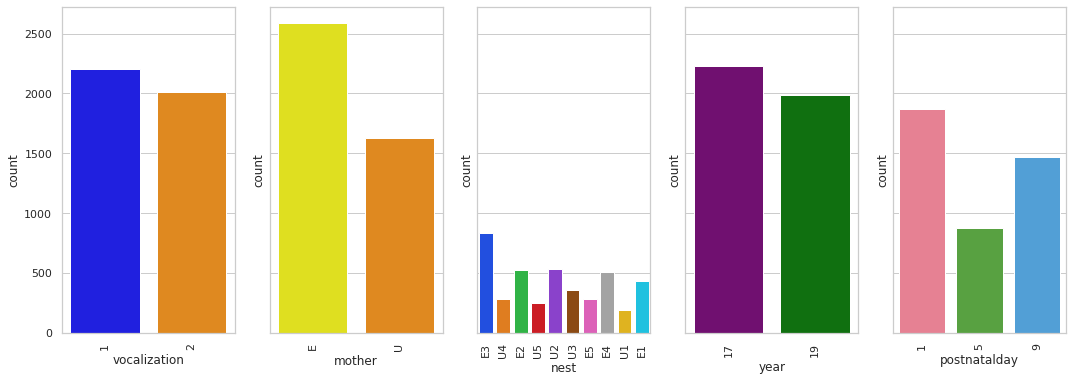

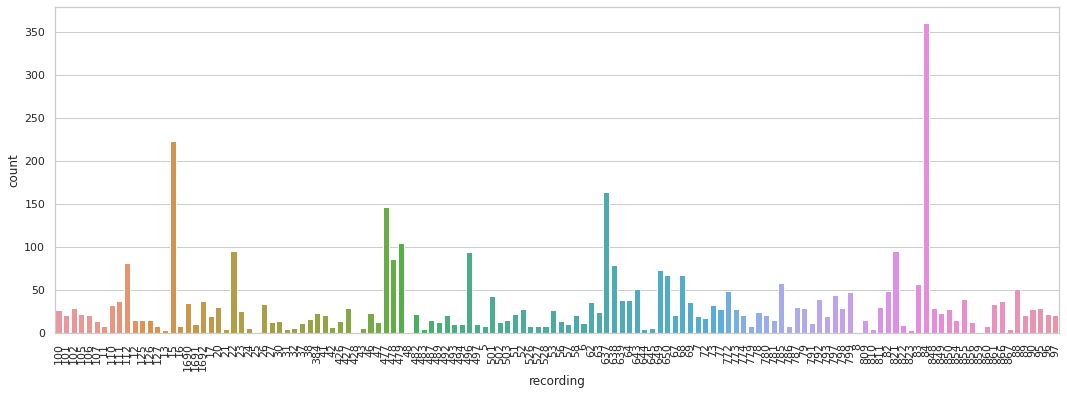

In [18]:
KEYS = ['vocalization', 'mother', 'nest', 'year', 'postnatalday']
f, axes = plt.subplots(1, len(KEYS), figsize=(18, 6), sharex=False, sharey=True)
for k, ax in zip(KEYS, axes):
    p = sns.countplot(
        data=df[k].to_frame().astype(str), x=k, palette=get_palette(k), ax=ax)
    ticks = p.get_xticklabels()
    nticks = p.set_xticklabels(p.get_xticklabels(), rotation=90)
    
f, ax = plt.subplots(1, 1, figsize=(18, 6), sharex=False, sharey=True)
p = sns.countplot(
        data=df['recording'].to_frame().astype(str), x='recording', ax=ax)
nticks = p.set_xticklabels(p.get_xticklabels(), rotation=90)

# Vocalization counts per nest and postnatalda

Text(0.5, 0.98, 'Harmonics and USV cumulated vocalization counts per nest and postnatalday')

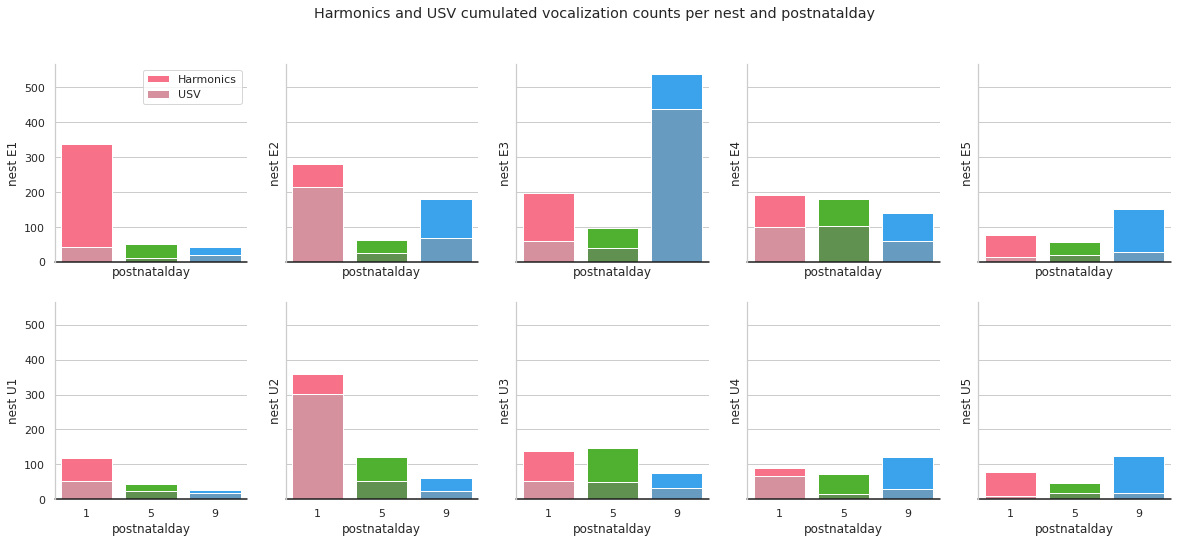

In [19]:
pal = get_palette('postnatalday')



tmp1 = df[df.vocalization == 1][['postnatalday', "nest", "mother", "event"]]
tmp2 = df[df.vocalization == 2][['postnatalday', "nest", "mother", "event"]]
tmp = df[['postnatalday', "nest", "mother", "event"]]


f, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)

for j in range(len(MOTHERS)):
    for i in range(5):
        m = MOTHERS[j]
        n = m + str(i+1)
        ax = axes[j, i]
        sns.countplot(data=tmp[tmp.nest == n], x='postnatalday', ax=ax, palette=pal, saturation=1, label="Harmonics")
        sns.countplot(data=tmp2[tmp2.nest == n], x='postnatalday', ax=ax, palette=pal, saturation=.5, label="USV")
        ax.set_ylabel(f"nest {n}")
        ax.axhline(0, color="k", clip_on=False)
axes[0, 0].legend(ncol=1, loc="upper right", frameon=True)



sns.despine(bottom=True)
#plt.tight_layout(h_pad=1.5)
f.suptitle('Harmonics and USV cumulated vocalization counts per nest and postnatalday')


/home/utilisateur/anaconda3/envs/usv/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


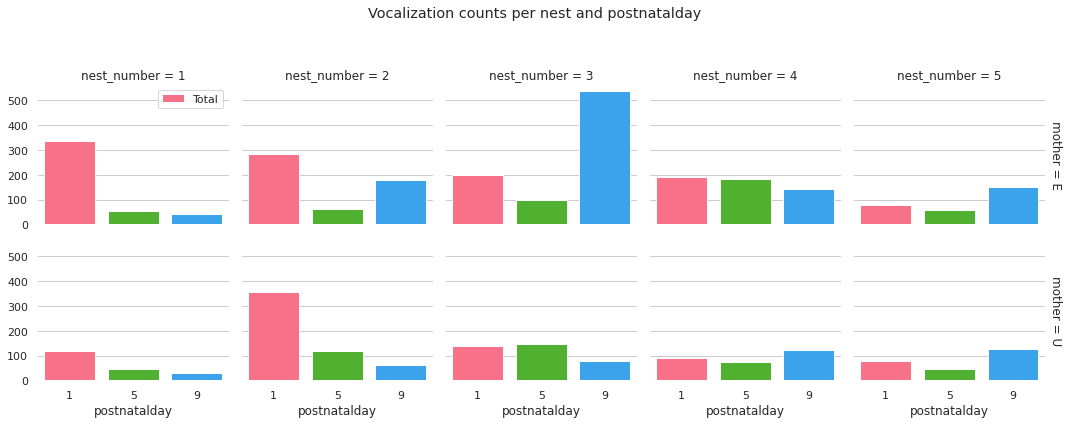

In [20]:
t = tmp.assign(nest_number=tmp['nest'].apply(lambda n: n[1]))
g = sns.FacetGrid(t, row="mother", col="nest_number", margin_titles=True)


g.map(sns.countplot, 'postnatalday', palette=pal, saturation=1, orient='h', label='Total')

plt.subplots_adjust(top=0.8)
#g.set_titles("")
g.despine(bottom=True, left=True)
g.fig.suptitle('Vocalization counts per nest and postnatalday')
g.fig.axes[0].legend(ncol=1, loc="upper right", frameon=True)

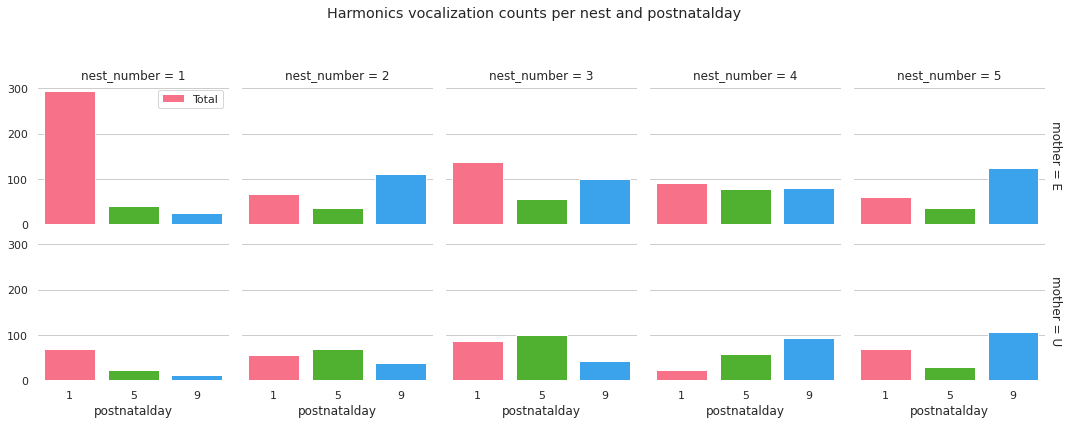

In [21]:
t1 = tmp1.assign(nest_number=tmp['nest'].apply(lambda n: n[1]))
g = sns.FacetGrid(t1, row="mother", col="nest_number", margin_titles=True)


g.map(sns.countplot, 'postnatalday', palette=pal, saturation=1, orient='h', label='Total')

plt.subplots_adjust(top=0.8)
#g.set_titles("")
g.despine(bottom=True, left=True)
g.fig.suptitle('Harmonics vocalization counts per nest and postnatalday')
g.fig.axes[0].legend(ncol=1, loc="upper right", frameon=True)